### Practical 6

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import datetime as dt


from tensorflow.keras.layers import Dense, Dropout
from keras.layers import GRU
from keras.models import Sequential, load_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
main_dataset1 = pd.read_csv("/Users/sharvarisoparkar/Desktop/Deep_learning_folder/Practical6/dataset/complete.csv") #Read the data

In [3]:
main_dataset1.head()

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
0,2020-01-30,Kerala,10.8505,76.2711,1.0,0,0.0,0,0,0
1,2020-01-31,Kerala,10.8505,76.2711,1.0,0,0.0,0,0,0
2,2020-02-01,Kerala,10.8505,76.2711,2.0,0,0.0,1,0,0
3,2020-02-02,Kerala,10.8505,76.2711,3.0,0,0.0,1,0,0
4,2020-02-03,Kerala,10.8505,76.2711,3.0,0,0.0,0,0,0


In [4]:
# Extracting date and total confirmed cases columns
date_column = 'Date'  # Assuming 'Date' is the column name for date
confirmed_cases_column = 'Total Confirmed cases'  # Assuming 'Total Confirmed cases' is the column name for confirmed cases

# Selecting only the columns of interest
main_dataset = main_dataset1[[date_column, confirmed_cases_column]]

# Displaying the selected data
print(main_dataset)

            Date  Total Confirmed cases
0     2020-01-30                    1.0
1     2020-01-31                    1.0
2     2020-02-01                    2.0
3     2020-02-02                    3.0
4     2020-02-03                    3.0
...          ...                    ...
4687  2020-08-06                73050.0
4688  2020-08-06                 5725.0
4689  2020-08-06               104388.0
4690  2020-08-06                 8254.0
4691  2020-08-06                83800.0

[4692 rows x 2 columns]


In [5]:
main_dataset['Total Confirmed cases'] = main_dataset['Total Confirmed cases'].astype(int)

/var/folders/_2/bhvs0hg507b193s64c1g1lhr0000gp/T/ipykernel_54015/311317157.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_dataset['Total Confirmed cases'] = main_dataset['Total Confirmed cases'].astype(int)


In [6]:
main_dataset

,Date,Total Confirmed cases
0,2020-01-30,1
1,2020-01-31,1
2,2020-02-01,2
3,2020-02-02,3
4,2020-02-03,3
...,...,...
4687,2020-08-06,73050
4688,2020-08-06,5725
4689,2020-08-06,104388
4690,2020-08-06,8254


In [7]:
main_dataset = main_dataset.rename(columns={'Total Confirmed cases': 'Cases'})

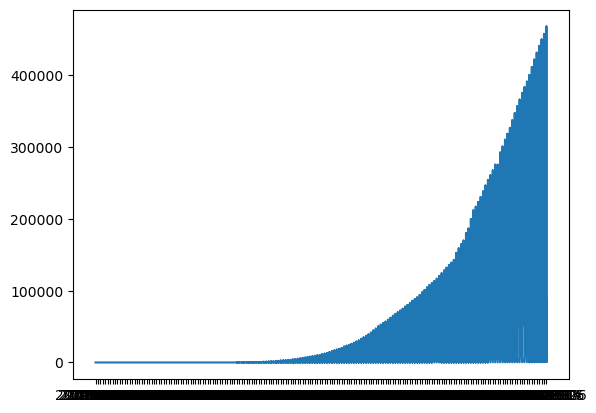

In [8]:
plt.plot(main_dataset.Date,main_dataset.Cases)
plt.show()

In [9]:
dataset = main_dataset #Create another dataset same as the main dataset. Just to avoid replacing the main one.
dataset = dataset.set_index('Date') 
dataset = dataset['Cases']

In [10]:
dataset=dataset.to_frame() #Convert the Series into a dataframe object
dataset['Cases_MA2']=dataset.expanding(min_periods=3).mean()  #min_periods is used to set the no. of periods for calculating MA. Mean is for calculating average.

In [11]:
dataset['EMA'] = dataset.iloc[:,0].ewm(span=3,adjust=False).mean() #ewm is used exponential moving average

In [12]:
dataset = dataset[dataset['Cases_MA2'].notna()] #Remove the rows that have NAs

In [13]:
dataset.head()

,Cases,Cases_MA2,EMA
Date,,,
2020-02-01,2,1.333333,1.50000
2020-02-02,3,1.750000,2.25000
2020-02-03,3,2.000000,2.62500
2020-02-04,3,2.166667,2.81250
2020-02-05,3,2.285714,2.90625


In [14]:
#Cases is the column we have to predict.
target=dataset[['Cases']]
del dataset['Cases']

In [16]:
x, y = dataset.values, target.values

In [17]:
x.shape

(4690, 2)

In [18]:
y.shape

(4690, 1)

In [19]:
x_scaled_set = MinMaxScaler() #Use MinMaxScaler function from sklearn.preprocessing library
y_scaled_set = MinMaxScaler()

X = x_scaled_set.fit_transform(x) #Fit to data and transform the data array x
Y = y_scaled_set.fit_transform(y.reshape(-1,1)) #Fit to data and transform the data array y. Reshape the y variable to long format

In [20]:
x.shape

(4690, 2)

In [21]:
X_train_data=X[0:4000,]
y_train_data=Y[0:4000,]
X_test_data=X[4000:4690,]
y_test_data=Y[4000:4690,]

In [22]:
X_train_data.shape

(4000, 2)

In [23]:
y_test_data.shape

(690, 1)

In [24]:
X_train_data = X_train_data.reshape((-1,1,2)) #Reshape train dataset to required format
X_test_data = X_test_data.reshape((-1,1,2)) #Reshape test dataset to required format

In [31]:
GRU_model = Sequential() #Use Sequential function from keras.model library
GRU_model.add(GRU(units=512,
              return_sequences=True,
              input_shape=(1, 2))) #Add GRU model with 512 units. Note that return sequences should be true to pass on the sequences. Ensure that input_shape is inline with the inout data.
GRU_model.add(Dropout(0.2)) #Add a dropout layer to avoid overfitting.
GRU_model.add(GRU(units=256)) #Add another GRU layer with 256 units.
GRU_model.add(Dropout(0.2)) #Add another dropout layer to avoid overfitting.
GRU_model.add(Dense(1, activation='linear')) #Finally, add a

In [32]:
GRU_model.compile(loss='mse', optimizer='adam', metrics = ['accuracy']) #mse is mean square error which is the loss function and Adam optimizer will be the ooptimizer.

In [33]:
GRU_model.fit(X_train_data,y_train_data,batch_size=250, epochs=100, validation_split=0.15, verbose=1)
#GRU_model.save("covid_GRU.h5") #Save the model if you want for reuse.

Epoch 1/100
14/14 [==============================] - 3s 65ms/step - loss: 5.1967e-04 - accuracy: 0.0800 - val_loss: 0.0051 - val_accuracy: 0.0000e+00
Epoch 2/100
14/14 [==============================] - 0s 23ms/step - loss: 2.5184e-04 - accuracy: 0.0800 - val_loss: 0.0023 - val_accuracy: 0.0000e+00
Epoch 3/100
14/14 [==============================] - 0s 33ms/step - loss: 1.4645e-04 - accuracy: 0.0800 - val_loss: 0.0021 - val_accuracy: 0.0000e+00
Epoch 4/100
14/14 [==============================] - 0s 25ms/step - loss: 1.5302e-04 - accuracy: 0.0800 - val_loss: 0.0021 - val_accuracy: 0.0000e+00
Epoch 5/100
14/14 [==============================] - 0s 28ms/step - loss: 1.4499e-04 - accuracy: 0.0800 - val_loss: 0.0022 - val_accuracy: 0.0000e+00
Epoch 6/100
14/14 [==============================] - 0s 28ms/step - loss: 1.5067e-04 - accuracy: 0.0800 - val_loss: 0.0021 - val_accuracy: 0.0000e+00
Epoch 7/100
14/14 [==============================] - 0s 27ms/step - loss: 1.4925e-04 - accuracy: 0.0

In [34]:
score = GRU_model.evaluate(X_test_data, y_test_data) #Evaluate model can be used to get the loss metric.
print('Score: {}'.format(score))
y_pred = GRU_model.predict(X_test_data) #Apply the built model on test data.
y_test_pred = y_scaled_set.inverse_transform(y_pred) #Use inverse transform to undo the scaling that was done before. This gives us the original values.
y_test_actual = y_scaled_set.inverse_transform(y_test_data) # Apply the inverse transform on the actual dataset for easy comparison of predicted vs actual.
#plt.plot(y_test_pred[-100:], label='Predicted') #Plot the predicted vs actual graph
#plt.plot(y_test_actual[-100:], label='Actual')
#plt.legend()
#plt.show()

22/22 [==============================] - 0s 3ms/step - loss: 0.0066 - accuracy: 0.0014
Score: [0.006643820554018021, 0.0014492754125967622]
22/22 [==============================] - 0s 2ms/step


In [35]:
test_Dates=main_dataset.Date[4000:4690] #create an object which has the dates for the Test data.

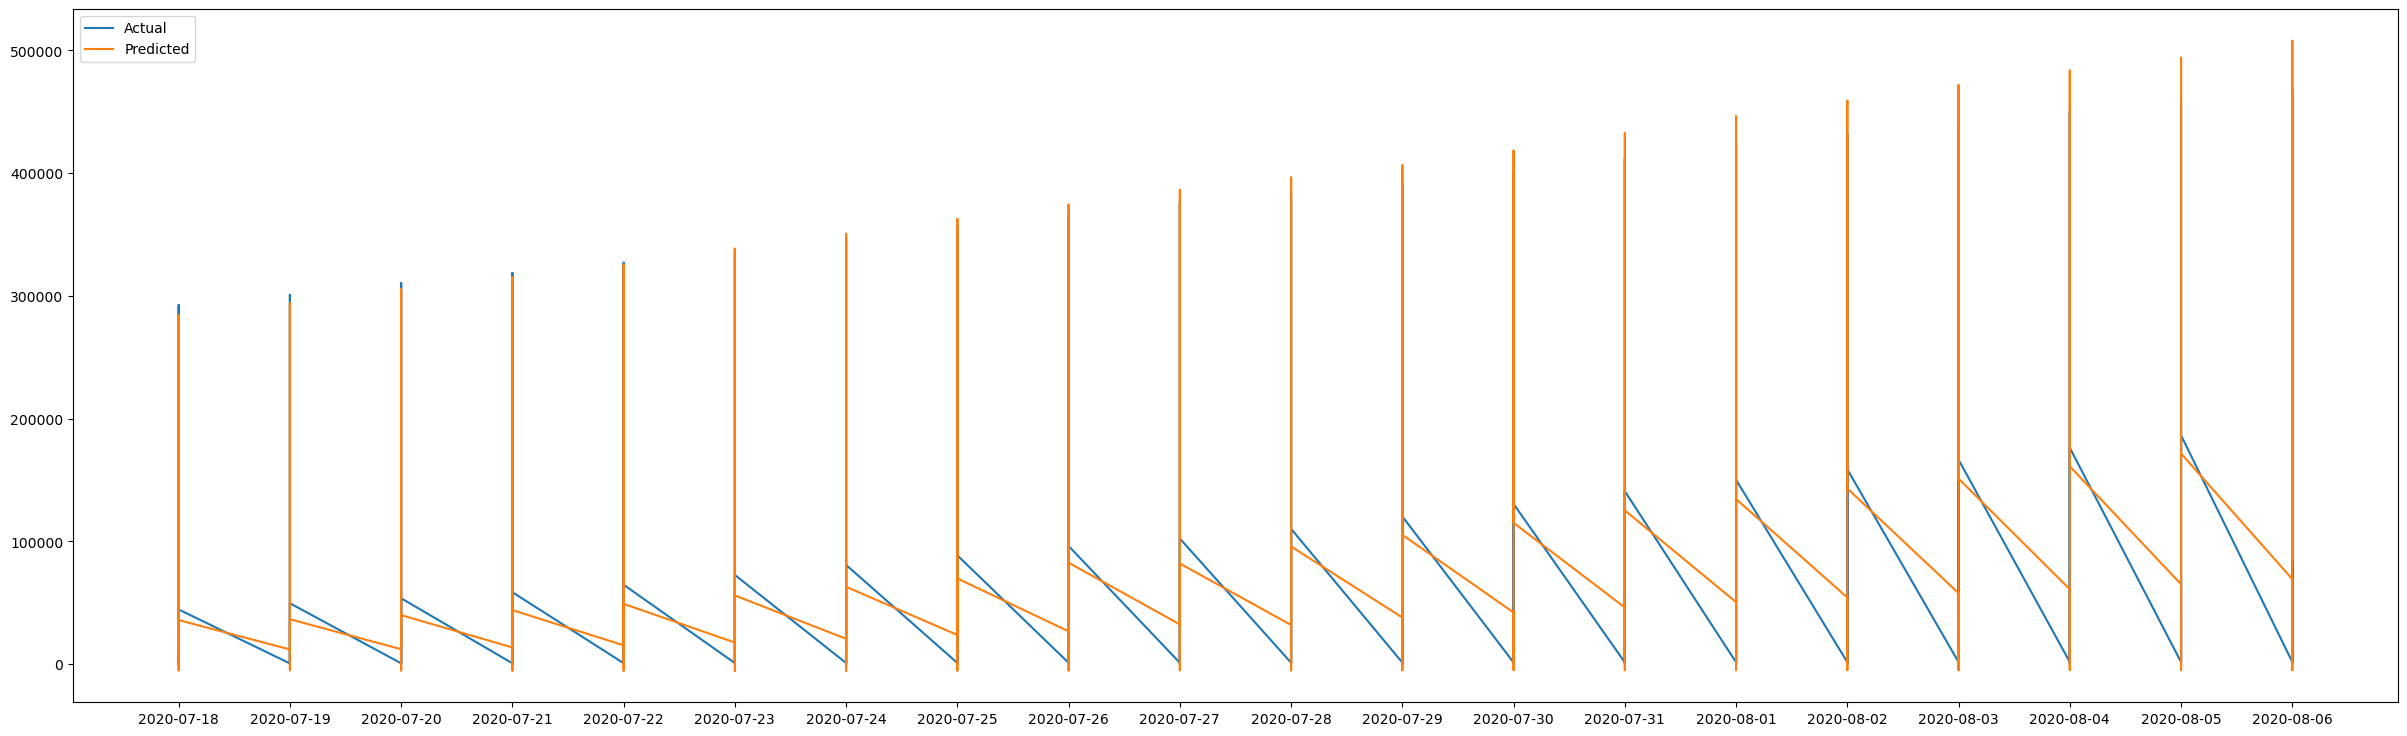

In [40]:


# Define the figure size
fig_size = (30, 9)  # Adjust width and height as needed

# Create a new figure with the specified size
plt.figure(figsize=fig_size)

# Assuming test_Dates, y_test_actual, and y_test_pred are already defined

# Plot actual and predicted data
plt.plot(test_Dates, y_test_actual[-690:], label='Actual')
plt.plot(test_Dates, y_test_pred[-690:], label='Predicted')

# Add legend
plt.legend()

# Show the plot
plt.show()
